In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.base import clone
from cross_val import *
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
import random
from sklearn.decomposition import PCA

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
def plotNumbers(X, y, text = 'label: ', n_rows = 1, figsize=(10, 3)):
    _, axes = plt.subplots(nrows=n_rows, ncols=int(len(y)/n_rows), figsize=figsize)

    for ax, image, label in zip(axes.reshape(-1), X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(text + "%s" % str(label))

def invert(data):
    for d in data:
        d[:] = 255 - d[:]

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

invert(X)

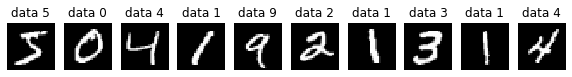

In [4]:
plotNumbers(X[:10], y[:10], 'data ')

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=5000)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = PCA(n_components = 0.9)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [9]:
%%time

clf = svm.LinearSVC(tol=1e-5)
clf.fit(X_train_scaled, y_train)

Z = clf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, Z)
print("Classifier performance %.4f" %  accuracy)

Classifier performance 0.9030
Wall time: 8min 8s


C:\Users\user2\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [10]:
%%time

clf = svm.LinearSVC(tol=1e-5)
clf.fit(X_train, y_train)

Z = clf.predict(X_val)
accuracy = accuracy_score(y_val, Z)
print("Classifier performance %.4f" %  accuracy)

Classifier performance 0.8958
Wall time: 8min 42s


C:\Users\user2\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
